In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import opendatasets as od

In [6]:
train_data_dir = r"D:\Image-Classifier-CNN\cats-and-dogs-for-classification\cats_dogs\train"
test_data_dir = r"D:\Image-Classifier-CNN\cats-and-dogs-for-classification\cats_dogs\test"

In [7]:
BATCH_SIZE = 32
IMGAGE_SIZE = 128

In [8]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMGAGE_SIZE, IMGAGE_SIZE),
    validation_split=0.1,
    subset="training", 
    shuffle=True,
    seed=42
)
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMGAGE_SIZE, IMGAGE_SIZE),
    validation_split=0.1,
    subset="validation", 
    shuffle=True,
    seed=42
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMGAGE_SIZE, IMGAGE_SIZE),
    shuffle=True,
)


Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [10]:
class_names = train_data.class_names

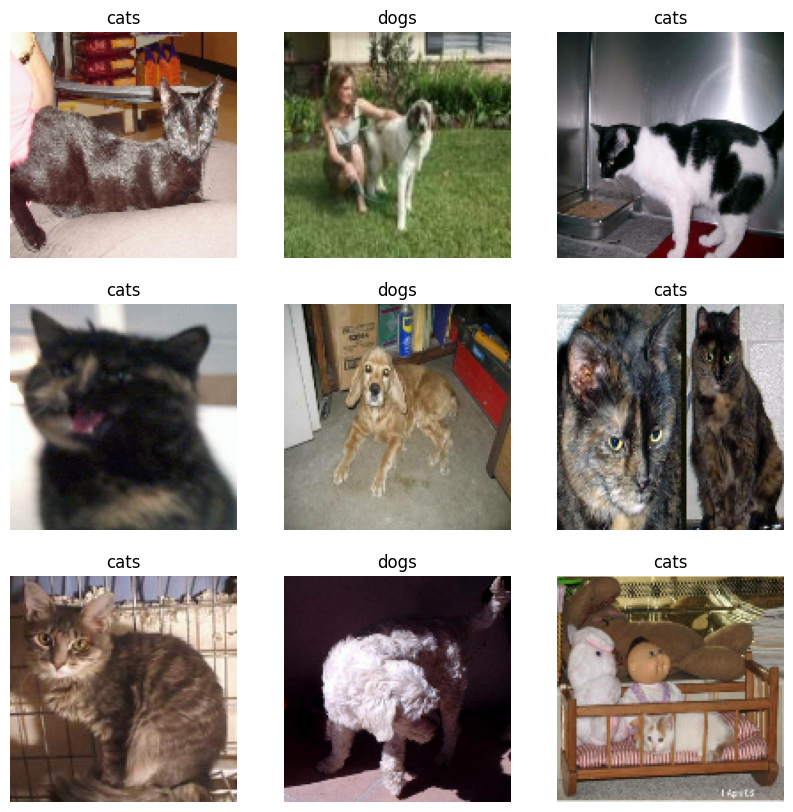

In [11]:
train_data.take(1)
for images, labels in train_data.take(1):  #relavent to first batch
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

In [13]:
for image_batch, labels_batch in train_data.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 128, 128, 3)
(32,)


## Scale Images

In [14]:
train_data = train_data.map(lambda x,y: (x/255.0, y))  # Normalize the images to [0,1]
validation_data = validation_data.map(lambda x,y: (x/255.0, y))  # Normalize the images to [0,1]
test_data = test_data.map(lambda x,y: (x/255.0, y))

## Transfer Learning

In [15]:

pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(128,128,3),
                                                           weights="imagenet",
                                                           pooling='max')

for layer in pretrained_model.layers:
        layer.trainable=False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 71s 1us/step


## Model Building

In [18]:

model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,144,425 (80.66 MB)

 Trainable params: 282,945 (1.08 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

## Model Training

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [23]:
import time

In [24]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=3,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 225s 967ms/step - accuracy: 0.9127 - loss: 0.2026 - val_accuracy: 0.9375 - val_loss: 0.1353
Epoch 2/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 222s 988ms/step - accuracy: 0.9489 - loss: 0.1197 - val_accuracy: 0.9450 - val_loss: 0.1288
Epoch 3/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.9605 - loss: 0.0986 - val_accuracy: 0.9613 - val_loss: 0.1070


## Performance Analysis

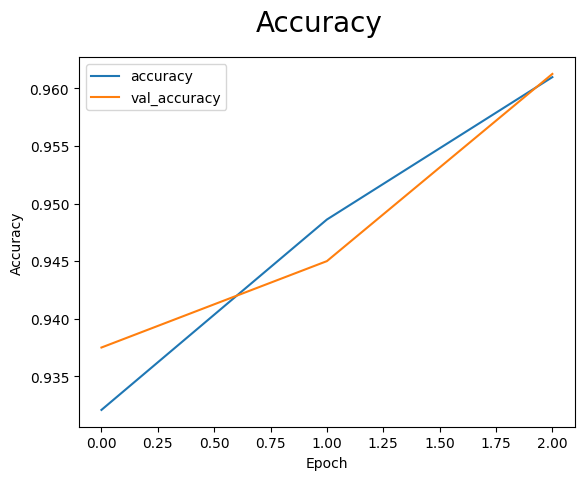

In [25]:
fig = plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()


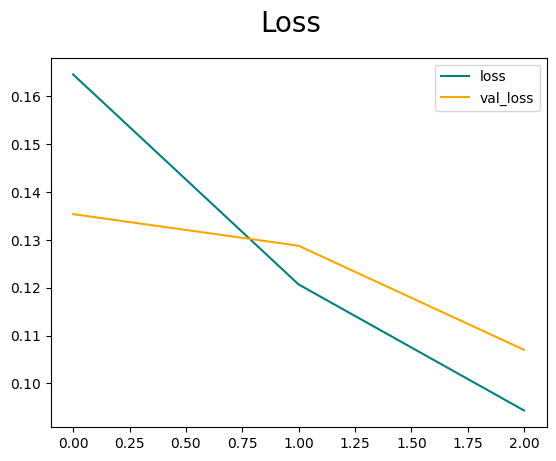

In [26]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()


## Model Evaluation

In [27]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [28]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [29]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9487179517745972>

In [30]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9620000123977661>

In [31]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9549999833106995>